# Homework 3: Integrating differential equations
**Due Friday, April 24**  

Aidan-James Olvera

### Homework checklist

Before submitting, make sure that you

- Fill in your name in the space above
- Cite any resources that you used while working on this homework
- 1. Fill in the markdown cell to interpret the terms of the differential equations  
- 2.a. Write your own code to compute derivatives for the dynamics  
- 2.b. Fill in the initial conditions, integrate the differential equations using Euler's method, and plot the results   
- 2.c. Use the markdown cell to explain what you observe  
- 2.d. Copy/paste your code to rerun the dynamics over a longer period of time  
- 2.e. Run the dynamics with a different choice of parameters  
- 2.f. Run the dynamics with a poorly chosen time step, and interpret the results: what went wrong?  
- 3.a. Plot the predator-prey dynamics in "phase space"  
- 3.b. Add velocities to the phase space plot  
- 3.c. Interpret the results -- how would you summarize the cycle of predator-prey dynamics?  

## Background

This problem is based on Exercise 8.2 in Newman's *Computational Physics*. The [Lotka-Volterra equations](https://en.wikipedia.org/wiki/Lotka–Volterra_equations) provide a simple a model of the population dynamics of predators and prey. They also naturally appear in some physical models and in economics.

Let $x$ be proportional to the population of prey animals (traditionally called "rabbits"), and  let $y$ be proportional to the population of predators (traditionally called "foxes").

In this model the rabbits reproduce at a constant rate, but they are also eaten by the foxes. The foxes reproduce at a rate proportional to how much they eat, but they also die of old age. 

The Lotka-Volterra equations are  

$$
\begin{align} \begin{aligned}
\frac{dx}{dt} &= \alpha x - \beta x y\,,\\  
\frac{dy}{dt} &= \gamma x y - \delta y\,.  
\end{aligned} \end{align}
$$
 
The dimensionless parameters $\alpha$, $\beta$, $\gamma$, and $\delta$ are positive real numbers that characterize the interaction of the two species.

## 1. Understanding the problem

In the Markdown cell below, explain the meaning of the parameters $\alpha$, $\beta$, $\gamma$, and $\delta$. What happens in the case when $\beta = \gamma = 0$?

* $\alpha$ is the rabbit reproduction rate. This is because the rate of change of the rabbit population ($\dot{x}$) has a term $\alpha x$, which makes the population increase at a rate proportional to the population itself.   
* $\beta$ is the rate at which the prey dies which is also proportional to the number of predators.
* $\gamma$ is the rate that the predators reproduce which is proportional to the population of prey.
* $\delta$ is the rate at which the predators die.  

The special case $\beta = \gamma = 0$ is analytically solvable. In that case the populations don't affect each other. What happens to each population in that case?

Under this special case, the prey will reproduce exponetially with no limit while the predators will die off at an eponential rate.

## 2. Coding the dynamics

Let's build the code to understand this system. We have two first order differential equations,

$$
\begin{align} \begin{aligned}
\frac{dx}{dt} &= f(x, y, t)\,,\\  
\frac{dy}{dt} &= g(x, y, t)\,.  
\end{aligned} \end{align}
$$

Let these be functions of global variables, $\alpha=$ `a`, $\beta=$ `b`, $\gamma=$ `c`, and $\delta=$ `d`. We can integrate these in the same way that we would approach a single differential equation. The only tricky thing to consider in this case is that we should update the values of $x$ and $y$ at the same time, rather than sequentially.

### 2.a. Defining the parameters and derivative functions

Fill this in to set up the problem:

In [37]:
# We can define all parameters at once

a, b, c, d = .6, 1.3, 1.0, 1.0

def f(x, y, t):
   
    return (a * x) - (b * x * y)

def g(x, y, t):
   
    return (c*x*y) - (d * y)

In [38]:
# Test your code: you should get 0.047 and -0.09:
print( f(.1, .1, 0) )
print( g(.1, .1, 0) )

0.047
-0.09


### 2.b. Time evolution 

At $t=0$, use the **initial conditions** $x(0) = y(0) = 2$. We would like to know what happens to the populations from the initial time $t=0$ to a later time $t=5$. In this case, we aren't particularly concerned about the units of $t$.

Use **Euler's method** to generate Python arrays `xlist` and `ylist`, giving the values of $x$ and $y$ over time. Use a time step of $\Delta t = 0.005$.

Then, plot the populations as a function of time using `seaborn` and/or `matplotlib`. 

As always, feel free to consult each other, previous work/notes in this course, and resources online. Make sure to reference any outside sources that you use.

In [39]:
def euler_integrate(f, x0, a, b, numsteps):
    
    dt = (b - a)/numsteps
    
    times = np.arange(a, b + dt, dt)
    
    xs = []
    
    current_x = x0
    
    for t in times:
        xs.append(current_x)
        current_x += dt * f(current_x, y,t)
        
    return times, xs

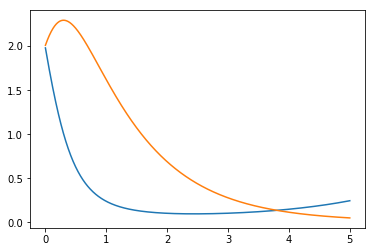

In [40]:
%matplotlib inline
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

a, b, c, d = .6, 1.3, 1.0, 1.0

x0 = 2 # FILL IN, initial rabbit population
y0 = 2 # FILL IN, initial fox population
dt = .005 # FILL IN, time step
t=5
numsteps = t/dt
time = np.linspace(0, t, int(numsteps) + 1)  # FILL IN, an array of times

xlist = [] # FILL IN, initialize array
ylist = [] # FILL IN, initialize array

# Initialize x and y
x = x0 # FILL IN
y = y0 # FILL IN

# Iterate through each time to update the populations
for t in time:
    x += dt * f(x, y, t)
    y += dt * g(x, y, t)

    xlist.append(x)
    ylist.append(y)
    
    # FILL THIS IN WITH EULER'S METHOD

# FILL IN TO PRODUCE THE PLOT SHOWN IN PART c BELOW
plt.figure()
plt.plot(time, xlist)
plt.plot(time, ylist)
plt.show()

### 2.c. Discussion

Your plot should look something like this:

<img src="rabbits-foxes.png" width=500>

In your own words, explain what is going on with the rabbit and fox populations over the time period shown. What do you expect will happen as these populations continue to dynamically evolve?

The foxes initially eat the rabbits but when there are few rabbits, the foxes die off quicker. So this graph shows the first part of the cycle.

### 2.d. Evolution into the future

Copy your code from part 2.b and paste it into the empty cell below. Re-run the code to go from $t=0$ to $t=25$.

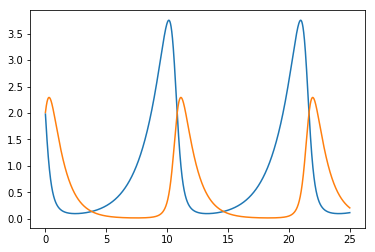

In [41]:
%matplotlib inline
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

a, b, c, d = .6, 1.3, 1.0, 1.0

x0 = 2 # FILL IN, initial rabbit population
y0 = 2 # FILL IN, initial fox population
dt = .005 # FILL IN, time step
t=25
numsteps = t/dt
time = np.linspace(0, t, int(numsteps) + 1)  # FILL IN, an array of times

xlist = [] # FILL IN, initialize array
ylist = [] # FILL IN, initialize array

# Initialize x and y
x = x0 # FILL IN
y = y0 # FILL IN

# Iterate through each time to update the populations
for t in time:
    x += dt * f(x, y, t)
    y += dt * g(x, y, t)

    xlist.append(x)
    ylist.append(y)
    
    # FILL THIS IN WITH EULER'S METHOD

# FILL IN TO PRODUCE THE PLOT SHOWN IN PART c BELOW
plt.figure()
plt.plot(time, xlist)
plt.plot(time, ylist)
plt.show()

### 2.e. Other initial conditions

Copy your code from part 2.b and paste it into the empty cell below. Re-run the code with a different set of Lotka-Volterra parameters:

```python
a, b, c, d = 4, 2, 3, 3
```

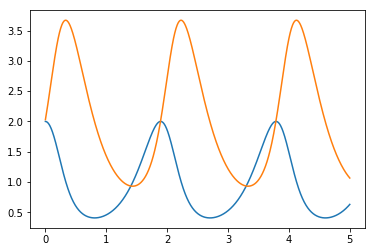

In [42]:
%matplotlib inline
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

a, b, c, d = 4, 2, 3, 3

x0 = 2 # FILL IN, initial rabbit population
y0 = 2 # FILL IN, initial fox population
dt = .005 # FILL IN, time step
t=5
numsteps = t/dt
time = np.linspace(0, t, int(numsteps) + 1)  # FILL IN, an array of times

xlist = [] # FILL IN, initialize array
ylist = [] # FILL IN, initialize array

# Initialize x and y
x = x0 # FILL IN
y = y0 # FILL IN

# Iterate through each time to update the populations
for t in time:
    x += dt * f(x, y, t)
    y += dt * g(x, y, t)

    xlist.append(x)
    ylist.append(y)
    
    # FILL THIS IN WITH EULER'S METHOD

# FILL IN TO PRODUCE THE PLOT SHOWN IN PART c BELOW
plt.figure()
plt.plot(time, xlist)
plt.plot(time, ylist)
plt.show()

### 2.f. Instability

Let's see what happens if the integration parameters are chosen poorly. 

Once again, copy your code from part 2.b and paste it into the empty cell below. You should be back to the original set of  Lotka-Volterra parameters:

```python
a, b, c, d = .6, 1.3, 1, 1
```

But this time, let's try to be cheap and use a much bigger time step. Try using `dt = 0.5` and integrating from $t=0$ to $t=5$. This should look nothing like the behavior you expect from the plots you produced earlier. Can you explain what went wrong?

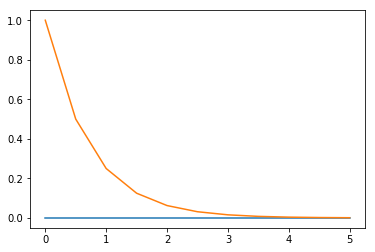

In [43]:
%matplotlib inline
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

a, b, c, d = .6, 1.3, 1.0, 1.0

x0 = 2 # FILL IN, initial rabbit population
y0 = 2 # FILL IN, initial fox population
dt = .5 # FILL IN, time step
t=5
numsteps = t/dt
time = np.linspace(0, t, int(numsteps) + 1)  # FILL IN, an array of times

xlist = [] # FILL IN, initialize array
ylist = [] # FILL IN, initialize array

# Initialize x and y
x = x0 # FILL IN
y = y0 # FILL IN

# Iterate through each time to update the populations
for t in time:
    x += dt * f(x, y, t)
    y += dt * g(x, y, t)

    xlist.append(x)
    ylist.append(y)
    
    # FILL THIS IN WITH EULER'S METHOD

# FILL IN TO PRODUCE THE PLOT SHOWN IN PART c BELOW
plt.figure()
plt.plot(time, xlist)
plt.plot(time, ylist)
plt.show()

**Explain what went wrong**: When the time step is larger, fewer points are being evaluated which makes the graph not as "smooth" as it should be in theory. Performing an integral with a function is just an approximation of the true value and when the time step is larger, the resolution of the graph drops.

## 3. Population Dynamics Phase Space

By now you've noticed the periodic behavior of the system. We can visualize how the predator and prey populations are related with a phase space plot. 

### 3.a. Plotting in the predator-prey plane

Copy the code from part 2.d above, where we integrated from $t=0$ to $t=25$, and modify it so that it plots the rabbit and fox populations on the horizontal and vertical axes, respectively. Note that, if you're using `seaborn` to make the line plot, you'll want to pass in an additional argument so that it appears correctly, like this:

```python
sns.lineplot(my_x, my_y, sort=False)
```

You'll need to define `my_x` and `my_y`.

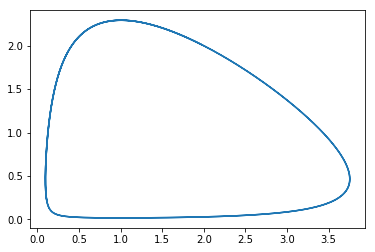

In [44]:
%matplotlib inline
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

a, b, c, d = .6, 1.3, 1.0, 1.0

x0 = 2 # FILL IN, initial rabbit population
y0 = 2 # FILL IN, initial fox population
dt = .005 # FILL IN, time step
t=25
numsteps = t/dt
time = np.linspace(0, t, int(numsteps) + 1)  # FILL IN, an array of times

xlist = [] # FILL IN, initialize array
ylist = [] # FILL IN, initialize array

# Initialize x and y
x = x0 # FILL IN
y = y0 # FILL IN

# Iterate through each time to update the populations
for t in time:
    x += dt * f(x, y, t)
    y += dt * g(x, y, t)

    xlist.append(x)
    ylist.append(y)
    
    # FILL THIS IN WITH EULER'S METHOD

# FILL IN TO PRODUCE THE PLOT SHOWN IN PART c BELOW
plt.figure()
plt.plot(xlist, ylist)

plt.show()

### 3.b. The velocity in population space

**Quiver plots** are what `matplotlib` calls plots of vector fields. Here's an example of how they work:

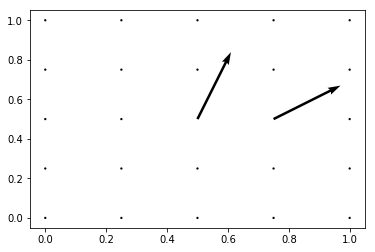

In [45]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# base positions of the vectors
x = np.linspace(0,1,5)
y = np.linspace(0,1,5)

# magnitude of the x- and y-components of each vector
u = np.zeros((5,5)) # initialize to zero everywhere
v = np.zeros((5,5)) # initialize to zero everywhere

u[2,2] = .1 # x-component of vector at (2,2)
v[2,2] = .2 # y-component of vector at (2,2)

u[2,3] = .2 # x-component of vector at (2,2)
v[2,3] = .1 # y-component of vector at (2,2)

plt.quiver(x, y, u, v, scale=1)
plt.show()

Make a vector field that shows the vector 

$$ \mathbf{v}(x,y) = \left (\dot x, \dot y \right)$$

at each position on the predator-prey plane. Some starter code for this is included below.

Overlay the vector field plot on the plot from Problem 3.a.

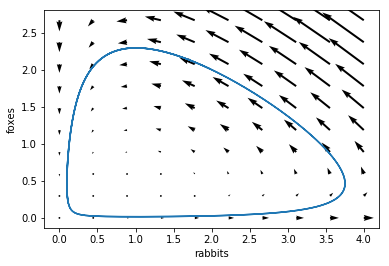

In [46]:
side = np.linspace(0, 4, 10)
XX,YY = np.meshgrid(side, side/1.5)
UU = f(XX,YY,0)
VV = g(XX,YY,0)

plt.quiver(XX, YY, UU, VV, scale = 80)
plt.plot(xlist, ylist)
plt.xlabel('rabbits')
plt.ylabel('foxes')
plt.show()

This image now shows the cyclic nature of the predator and prey populations as well as how long the populations spend in different parts of the cycle.

### 3.c. Describe the dynamics

In the Markdown cell below, write a few sentences describing the cycle of rabbit and fox populations. It may be useful to think about this in terms of three "phases" corresponding to the three notable features of the plot in Problem 3.b.

When there are many rabbits and few foxes, the foxes have pretty much unlimited food. So the population of foxes increases and the population of rabbits decreases. If there are any foxes and few rabbits, then the foxes will start starving and dying faster than the rabbits. When there are fewer foxes, the rabbits can repopulate much quicker and then the cycle starts again.